<a href="https://colab.research.google.com/github/neel17/natural-language-processing/blob/master/Multilabel_Classification_for_Tags_of_Stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io
import requests


import logging
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline


In [0]:
# Reading data 
url="https://storage.googleapis.com/tensorflow-workshop-examples/stack-overflow-data.csv"
s=requests.get(url).content

data =pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
data.head(2)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
post    40000 non-null object
tags    40000 non-null object
dtypes: object(2)
memory usage: 625.1+ KB


In [6]:
data.isnull().sum()

post    0
tags    0
dtype: int64

In [7]:
# Checking words in the data
print(data['post'].apply(lambda x: len(x.split(' '))).sum())

10286120


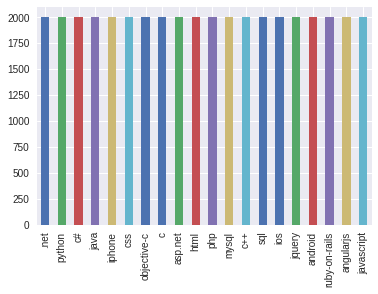

In [8]:
data['tags'].value_counts().plot(kind='bar')

In [0]:
df = data[pd.notnull(data['tags'])]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 2 columns):
post    40000 non-null object
tags    40000 non-null object
dtypes: object(2)
memory usage: 937.5+ KB


In [11]:
df['post'].apply(lambda x: len(x.split(' '))).sum()

10286120

In [12]:
df['post'][0:2]

0    what is causing this behavior  in our c# datet...
1    have dynamic html load as if it was in an ifra...
Name: post, dtype: object

In [0]:
# Unique list of tags
tags_list = df['tags'].unique()

In [14]:
# for importing nltk stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# importing stopwords 
import nltk
from nltk.corpus import stopwords

In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ',text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('',text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([i for i in text.split() if i not in STOPWORDS]) # delete stopwords from text
    return text

In [0]:
df['post'] = df['post'].apply(text_prepare)

In [18]:
df['post'].apply(lambda x:len(x.split(' '))).sum()

3907997

In [0]:
# Converting text into features using COuntVectorizer and tfidf

X = df['post']
y = df['tags']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Using Naive Bayes Classifier for Multinomial Models

In [0]:
# In order to make vectorizer --> transform --> classifier using Pipeline from scikit-learn

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
naive_bayes_pipeline = Pipeline([('vect', CountVectorizer()),\
                                 ('tfidf',TfidfTransformer()),#min_df = 5, max_df = 0.9, ngram_range = (1,2), token_pattern = '(\S+)')),\
                                  ('clf', MultinomialNB())\
                                ])
                                 

In [22]:
# Trained the model - Naive Bayes
naive_bayes_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [0]:
# Cheking the prediction, accuracy, and report

from sklearn.metrics import classification_report

y_pred = naive_bayes_pipeline.predict(X_test)

In [24]:
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7366666666666667


In [25]:
print('classification report \n')
print(classification_report(y_test, y_pred, target_names = tags_list))

classification report 

               precision    recall  f1-score   support

           c#       0.63      0.64      0.63       613
      asp.net       0.93      0.84      0.88       620
  objective-c       0.87      0.92      0.89       587
         .net       0.70      0.75      0.72       586
       python       0.73      0.87      0.79       599
    angularjs       0.69      0.52      0.59       589
       iphone       0.79      0.76      0.77       594
ruby-on-rails       0.69      0.89      0.78       610
          ios       0.59      0.61      0.60       617
            c       0.57      0.66      0.61       587
          sql       0.72      0.48      0.58       611
         java       0.80      0.79      0.79       594
       jquery       0.86      0.56      0.67       619
          css       0.64      0.84      0.73       574
          c++       0.64      0.84      0.73       584
          php       0.65      0.66      0.66       578
      android       0.81      0.76      

In [0]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [27]:
print('confusion matrix \n',confusion_matrix(y_test,y_pred, labels = tags_list))

confusion matrix 
 [[305  28  13  63   8   4   1   3   1  21  11  48   9   5  30  10   5   6
    5  13]
 [ 26 438   2  44   0   4   1   5   1   0   3   1  15   7   1   5   3   5
    2  23]
 [  4   3 382   9   3   0  36   1  85  23   3   6   1   6   8   0   2   2
    0   4]
 [ 72  66   4 390   6   4   3   2   4   8   8  11   0   2   8   3   4   6
    4   8]
 [  1   4   4   4 514   4   1   1   0  17   9   6   4   5   4   9   1  11
    1   8]
 [  0   3   1   4   1 541   0   1   2   0   1   0  11   6   0   2   1   0
    3  10]
 [  2   5  81   7   2   2 293   3 159   1   5   2   6  12   1   8   8   4
    3   7]
 [  1   5   3   2   1  11   3 557   1   1   4   0  13   3   1   3   1  11
    0  17]
 [  0   3  79   7   4   1  60   4 386   4   0   3   3  13   3   0   7   4
    2   4]
 [  1   0   2  12  11   0   0   0   2 521   0   7   0   1  35   3   1   1
    0   2]
 [  2   6   0   6   0   0   0   2   0   0 383   1   1   1   1   1   0 195
    0   2]
 [ 10   6   5  17   4   2   1   2   1  24   3 

# Linear Support Vector Machine

- It implements regularized linear modles with stochastic gradient descent (SGD) learning

- This works witht data represented as dense or sparse arrays of floating point values for the features

- By default it fits the linear support vector machine

In [0]:
# importing from sklearn
from sklearn.linear_model import SGDClassifier


In [0]:
# Pipeline for SGDClassifier

sgd_pipeline= Pipeline([('vect',CountVectorizer()),\
                         ('tfidf',TfidfTransformer()),\
                         ('clf',SGDClassifier(loss = 'hinge',penalty = 'l2',alpha=1e-3, random_state = 42,max_iter=5,tol =None)),
                        ])

In [30]:
# Model training using SGDClassifier pipeline

sgd_pipeline.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [0]:
# Making prediction using SGD
y_pred_sgd = sgd_pipeline.predict(X_test)

In [32]:
# Accuracy and classification report
print('accuracy %s'% accuracy_score(y_pred_sgd,y_test))

accuracy 0.7873333333333333


In [33]:
# Classification Report
print('Classification \n',
     classification_report(y_test,y_pred_sgd, target_names= tags_list))

Classification 
                precision    recall  f1-score   support

           c#       0.72      0.68      0.70       613
      asp.net       0.84      0.93      0.88       620
  objective-c       0.88      0.95      0.92       587
         .net       0.82      0.79      0.81       586
       python       0.72      0.87      0.79       599
    angularjs       0.79      0.41      0.54       589
       iphone       0.79      0.66      0.72       594
ruby-on-rails       0.69      0.95      0.80       610
          ios       0.81      0.55      0.66       617
            c       0.73      0.58      0.65       587
          sql       0.70      0.66      0.68       611
         java       0.83      0.86      0.85       594
       jquery       0.77      0.78      0.77       619
          css       0.84      0.86      0.85       574
          c++       0.82      0.80      0.81       584
          php       0.70      0.69      0.69       578
      android       0.82      0.90      0.86   

# Using Logistic Regression

In [0]:
# Importing the module
from sklearn.linear_model import LogisticRegression



In [35]:


logreg = Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('clf', LogisticRegression(n_jobs=1, C=1e5)),

               ])

logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [37]:
# Making prediction

logreg_y_pred = logreg.predict(X_test)



print('accuracy %s' % accuracy_score(logreg_y_pred, y_test))

print(classification_report(y_test, logreg_y_pred,target_names=tags_list))

accuracy 0.7895
               precision    recall  f1-score   support

           c#       0.70      0.63      0.66       613
      asp.net       0.92      0.90      0.91       620
  objective-c       0.96      0.94      0.95       587
         .net       0.79      0.77      0.78       586
       python       0.77      0.83      0.80       599
    angularjs       0.61      0.58      0.60       589
       iphone       0.78      0.75      0.76       594
ruby-on-rails       0.80      0.86      0.83       610
          ios       0.71      0.71      0.71       617
            c       0.63      0.62      0.62       587
          sql       0.67      0.65      0.66       611
         java       0.82      0.84      0.83       594
       jquery       0.79      0.79      0.79       619
          css       0.84      0.87      0.85       574
          c++       0.82      0.84      0.83       584
          php       0.65      0.65      0.65       578
      android       0.84      0.85      0.85    

# OneVsRest Approach - Logistic Regression

In [0]:
from sklearn.multiclass import OneVsRestClassifier

In [0]:
one_vs_rest_lr_pipeline =Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('clf', OneVsRestClassifier(LogisticRegression(penalty  = 'l2', C=1e5), n_jobs=1)),

               ])



In [40]:
# Pipleine 
one_vs_rest_lr_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=1))])

In [41]:
# Making prediction

one_vs_rest_lr_y_pred = one_vs_rest_lr_pipeline.predict(X_test)



print('accuracy %s' % accuracy_score(one_vs_rest_lr_y_pred, y_test))
print('Classification Report')
print(classification_report(y_test, one_vs_rest_lr_y_pred,target_names=tags_list))

accuracy 0.789
Classification Report
               precision    recall  f1-score   support

           c#       0.70      0.63      0.66       613
      asp.net       0.92      0.90      0.91       620
  objective-c       0.96      0.94      0.95       587
         .net       0.79      0.77      0.78       586
       python       0.77      0.83      0.80       599
    angularjs       0.61      0.58      0.60       589
       iphone       0.78      0.75      0.76       594
ruby-on-rails       0.80      0.86      0.83       610
          ios       0.70      0.71      0.71       617
            c       0.63      0.62      0.62       587
          sql       0.67      0.65      0.66       611
         java       0.82      0.84      0.83       594
       jquery       0.79      0.79      0.79       619
          css       0.84      0.86      0.85       574
          c++       0.82      0.84      0.83       584
          php       0.65      0.65      0.65       578
      android       0.84   

# OneVsRest Approach with tunning - Logistic regression

In [0]:
# Making the pipeline
ovr_lr_tuned_pipeline =Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('clf', OneVsRestClassifier(LogisticRegression(solver = 'sag', penalty  = 'l2', C=1e5), n_jobs=1)),

               ])


In [44]:
# Fitting the pipeline
ovr_lr_tuned_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..._state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False),
          n_jobs=1))])

In [45]:
# Making prediction

ovr_lr_tuned_pipeline_y_pred = ovr_lr_tuned_pipeline.predict(X_test)



print('accuracy %s' % accuracy_score(ovr_lr_tuned_pipeline_y_pred, y_test))
print('Classification Report')
print(classification_report(y_test, ovr_lr_tuned_pipeline_y_pred,target_names=tags_list))

accuracy 0.7950833333333334
Classification Report
               precision    recall  f1-score   support

           c#       0.71      0.63      0.67       613
      asp.net       0.93      0.91      0.92       620
  objective-c       0.96      0.94      0.95       587
         .net       0.78      0.78      0.78       586
       python       0.78      0.85      0.81       599
    angularjs       0.61      0.60      0.60       589
       iphone       0.78      0.75      0.76       594
ruby-on-rails       0.81      0.87      0.84       610
          ios       0.71      0.72      0.72       617
            c       0.64      0.61      0.62       587
          sql       0.67      0.66      0.67       611
         java       0.84      0.84      0.84       594
       jquery       0.79      0.80      0.80       619
          css       0.84      0.87      0.85       574
          c++       0.84      0.84      0.84       584
          php       0.65      0.66      0.66       578
      android 

# One Vs Rest - Logistic Regression
- Parameters 
  - solver : saga
  - penalty : l1
  - C : 1e5

In [0]:
# Making the pipeline
ovr_lr_tuned_pipeline2 =Pipeline([('vect', CountVectorizer()),

                ('tfidf', TfidfTransformer()),

                ('clf', OneVsRestClassifier(LogisticRegression(solver = 'sag', penalty  = 'l2', C=1e10, warm_start = True), n_jobs=-1)),

               ])


In [53]:
# Fitting the pipeline
ovr_lr_tuned_pipeline2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..._state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=True),
          n_jobs=-1))])

In [54]:
# Making prediction

ovr_lr_tuned_pipeline2_y_pred = ovr_lr_tuned_pipeline2.predict(X_test)



print('accuracy %s' % accuracy_score(ovr_lr_tuned_pipeline2_y_pred, y_test))
print('Classification Report')
print(classification_report(y_test, ovr_lr_tuned_pipeline2_y_pred,target_names=tags_list))

accuracy 0.7948333333333333
Classification Report
               precision    recall  f1-score   support

           c#       0.70      0.64      0.67       613
      asp.net       0.91      0.91      0.91       620
  objective-c       0.97      0.94      0.96       587
         .net       0.79      0.79      0.79       586
       python       0.78      0.84      0.81       599
    angularjs       0.62      0.59      0.60       589
       iphone       0.77      0.75      0.76       594
ruby-on-rails       0.81      0.87      0.84       610
          ios       0.72      0.72      0.72       617
            c       0.63      0.61      0.62       587
          sql       0.67      0.66      0.66       611
         java       0.84      0.83      0.84       594
       jquery       0.79      0.80      0.80       619
          css       0.85      0.87      0.86       574
          c++       0.84      0.84      0.84       584
          php       0.65      0.65      0.65       578
      android 